In [53]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
import re


stop_words = set(stopwords.words('english'))
style.use('ggplot')

In [77]:
quora_df = pd.read_csv('dataset/royal_family_quora_comments_dataset.csv')

In [6]:
quora_df.head()

,Quora Question,Reply/Comment,Classification,Label,Intensity
0,"If Prince Harry was not royalty, would Meghan ...",Pshhht please. This woman has never NOT dated ...,HS,1.0,1
1,NaN,No. She fell for a Prince. Not for Harry. If H...,HS,1.0,1
2,NaN,No she would not have married him. Megan sough...,HS,1.0,3
3,NaN,I agree 💯. Her ‘Is he nice’ line was to throw ...,HS,1.0,3
4,NaN,I noticed it too during the interview after th...,NHS,0.0,?


In [7]:
quora_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Quora Question  6 non-null      object 
 1   Reply/Comment   164 non-null    object 
 2   Classification  164 non-null    object 
 3   Label           164 non-null    float64
 4   Intensity       164 non-null    object 
dtypes: float64(1), object(4)
memory usage: 14.9+ KB


In [78]:
hate_speech_df = quora_df.iloc[:, 1:]
hate_speech_df.drop(columns=['Classification', 'Label'], inplace=True)
# print(hate_speech_df.isna().sum())

# Check for rows with NaN values and drop them
hate_speech_df.dropna(inplace=True)
hate_speech_df.head()

,Reply/Comment,Intensity
0,Pshhht please. This woman has never NOT dated ...,1
1,No. She fell for a Prince. Not for Harry. If H...,1
2,No she would not have married him. Megan sough...,3
3,I agree 💯. Her ‘Is he nice’ line was to throw ...,3
4,I noticed it too during the interview after th...,?


In [80]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r'ð','',text)
    text = re.sub(r'\n','',text)
    # text = re.sub(r' ng | sa | na | ang | mga | ay | si | ni | ito | pa | rin | may | natin ',' ',text)
    # text = re.sub(r' nga | para | kay | kung | noon | mga | dahil | hindi | noong | mula ',' ',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
import nltk
nltk.download()


In [81]:
hate_speech_df['Reply/Comment'] = hate_speech_df['Reply/Comment'].apply(data_processing)
display(hate_speech_df.tail(10))
# display(hate_speech_df.head(10))




,Reply/Comment,Intensity
154,loved meghan joined royal family couldnt wait ...,3
155,majority dont like vermin gutter trash,3
156,whats little meghan lot psyche people needing ...,1
157,read people expressing desire meghans child ta...,1
158,many liars deceivers pretendersdo really like ...,1
159,sad pathetic individuals something lacking liv...,?
160,news first announced meghan engaged harry took...,?
161,prior engagement attractive mediocre actress c...,1
162,dont think matter like dislike think matter so...,1
163,im studying law knew meghan role suits wasnt a...,1


In [82]:

# Tokenize the text (split by whitespace)
words = hate_speech_df['Reply/Comment'].str.lower().str.split()

words_flat = [word for sublist in words for word in sublist]


# Count the occurrences of each word
word_counts = Counter(words_flat)

# Sort the words based on their frequencies
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Create a DataFrame from the sorted word counts
df_word_counts = pd.DataFrame(sorted_word_counts, columns=['Word', 'Count'])

# Save the DataFrame to a CSV file
df_word_counts.to_csv('dataset/word_counts2.csv', index=False)




In [83]:
news_df = hate_speech_df.drop_duplicates('Reply/Comment')
# duplicate_rows = news_df.duplicated('Data')
# print("Number of duplicate rows:", duplicate_rows.sum())
# print(len(news_df))
display(news_df)

,Reply/Comment,Intensity
0,pshhht please woman never dated someone rich f...,1
1,fell prince harry harry man bus driver would s...,1
2,would married megan sought saw vulnerability t...,3
3,agree nice line throw everyone think sweet lit...,3
4,noticed interview became engaged rarely spoke ...,?
...,...,...
159,sad pathetic individuals something lacking liv...,?
160,news first announced meghan engaged harry took...,?
161,prior engagement attractive mediocre actress c...,1
162,dont think matter like dislike think matter so...,1


In [58]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [84]:
hate_speech_df['Reply/Comment'] = hate_speech_df['Reply/Comment'].apply(lambda x: lemmatizing(x))
display(hate_speech_df.head(10))


,Reply/Comment,Intensity
0,pshhht please woman never dated someone rich f...,1
1,fell prince harry harry man bus driver would s...,1
2,would married megan sought saw vulnerability t...,3
3,agree nice line throw everyone think sweet lit...,3
4,noticed interview became engaged rarely spoke ...,?
5,get surprise found money prince charless harry...,?
6,kind thats care ffffffffffffff eggs menu cant ...,1
7,well took time nice see real live americans wo...,3
8,rachel meghan markle even know kate middleton ...,1
9,harry knows marriage isnt going last hes good ...,1


In [85]:
hate_speech_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 0 to 163
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Reply/Comment  164 non-null    object
 1   Intensity      164 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [86]:
hate_speech_df['Intensity'].value_counts()

Intensity
1    61
3    61
?    29
2    10
4     3
Name: count, dtype: int64

### Data visualization 

Text(0.5, 0, '')

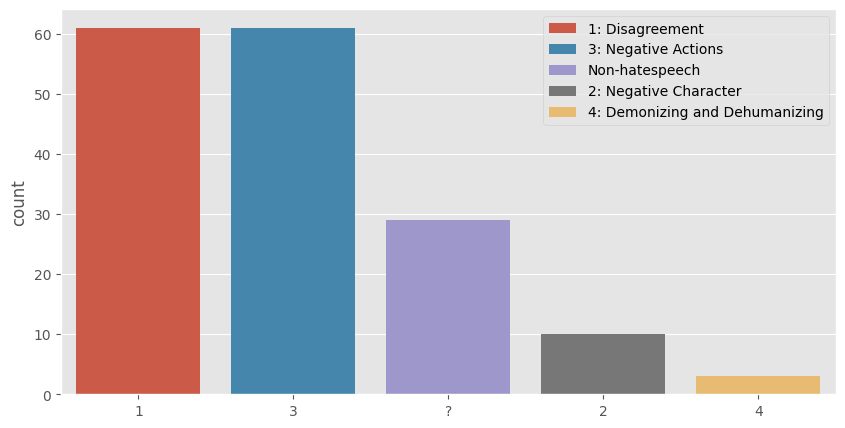

In [105]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Intensity', hue="Intensity", dodge=False, data = hate_speech_df, order = hate_speech_df['Intensity'].value_counts().index)
plt.legend(labels = ['1: Disagreement', '3: Negative Actions', "Non-hatespeech" ,"2: Negative Character","4: Demonizing and Dehumanizing"])
plt.xlabel('')

fig = plt.figure(figsize=(7,7))
colors = ["red", "gold", "green", "blue", "purple"]
wp = {'linewidth': 1, 'edgecolor': "black"}
tags = hate_speech_df['Intensity'].value_counts()
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.legend(labels = ['1: Disagreement', '3: Negative Actions', "Non-hatespeech" ,"2: Negative Character","4: Demonizing and Dehumanizing"])

plt.title('Distribution of sentiments')

In [17]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_y = LabelEncoder()
news_df['Classification'] = labelEncoder_y.fit_transform(news_df['Classification'])        
display(news_df.head())

,Data,Classification
0,hindi totoo ra 11587 base isang panukalang bat...,0
1,occidental mindoro state college town san jose...,1
2,hindi totoo kailanman nahalal bilang pangalawa...,0
3,im sure truly know bongbong marcos duly electe...,1
4,hindi totoo november 18 2020 nang humingi tawa...,0


In [18]:
fact = news_df[news_df.Classification == 0]
fact.head(10)

,Data,Classification
0,hindi totoo ra 11587 base isang panukalang bat...,0
2,hindi totoo kailanman nahalal bilang pangalawa...,0
4,hindi totoo november 18 2020 nang humingi tawa...,0
6,hindi totoo ayon korte suprema republic v sand...,0
8,hindi totoo walang matibay ebidensya makakapag...,0
10,hindi totoo walang opisyal paglunsad anunsyo b...,0
12,hindi totoo tumakas pamilyang marcos guam tulo...,0
14,hindi totoo kailanman nahalal bilang mayor gob...,0
16,hindi totoo ay recycled fake newswalang panaya...,0
18,hindi totoo november 26 2021 5th security brie...,0


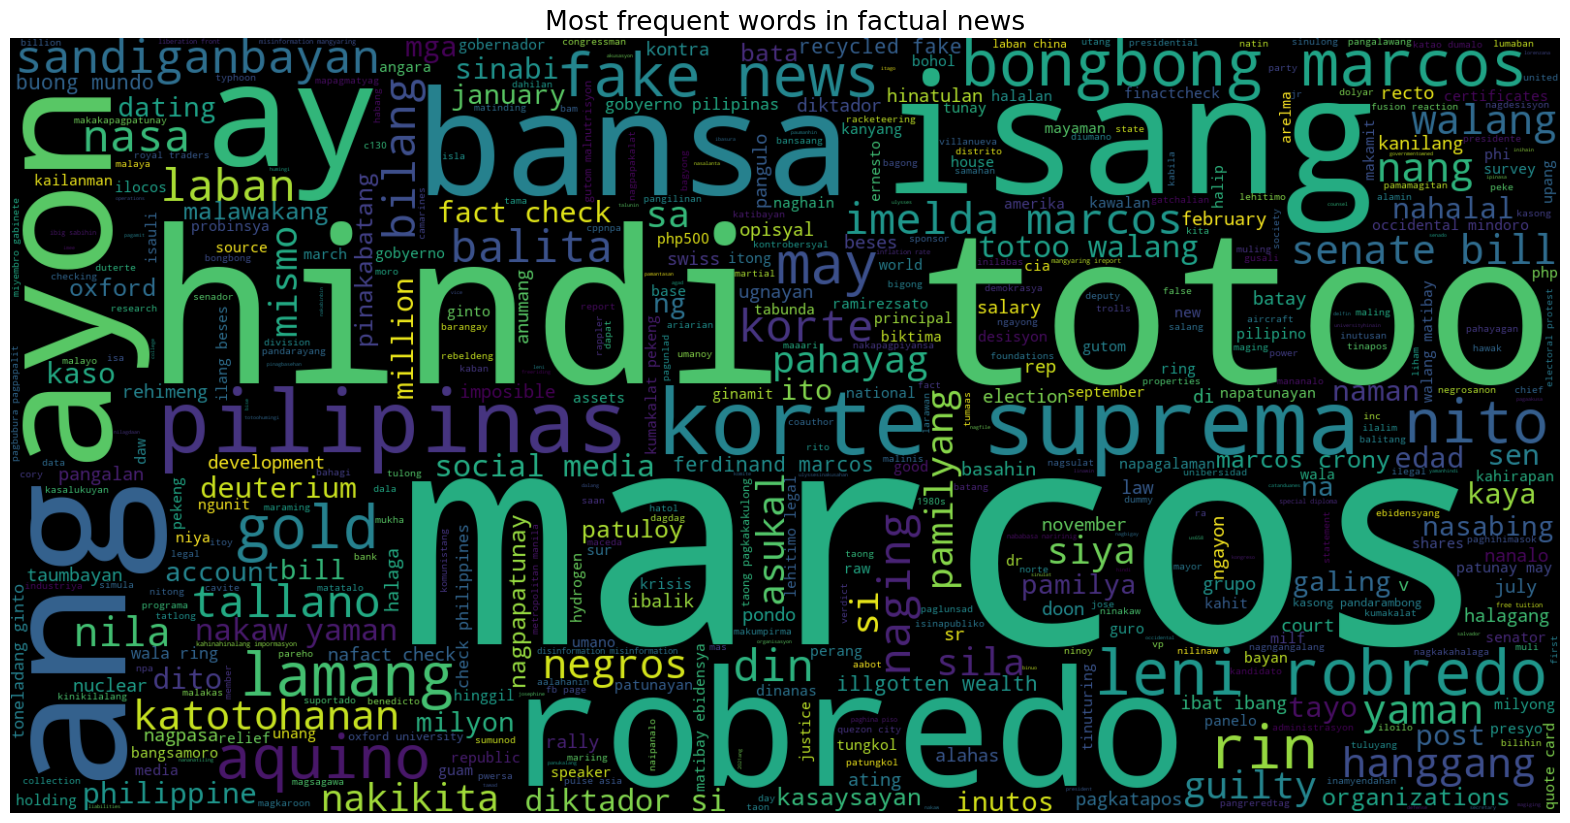

In [19]:
text = ' '.join([word for word in fact['Data']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in factual news', fontsize = 19)
plt.show()

In [20]:
fake = news_df[news_df.Classification == 1]
fake.head(10)

,Data,Classification
1,occidental mindoro state college town san jose...,1
3,im sure truly know bongbong marcos duly electe...,1
5,leni robredo talagang wala knang hiya subrang ...,1
7,1 sabi ra 1379 section 6 hindi maipaliwanag na...,1
9,ayon mahal hari filemon reambonanza panahon ng...,1
11,php 500 marcos banknotethe bangko sentral pili...,1
13,cia killed ferdinand marcosnang panahon presid...,1
15,ferdinand marcos youngest politician mayor con...,1
17,robredo anxious saying chaos ever deceived def...,1
19,bakit leni first point wants abolish ntfelcac ...,1


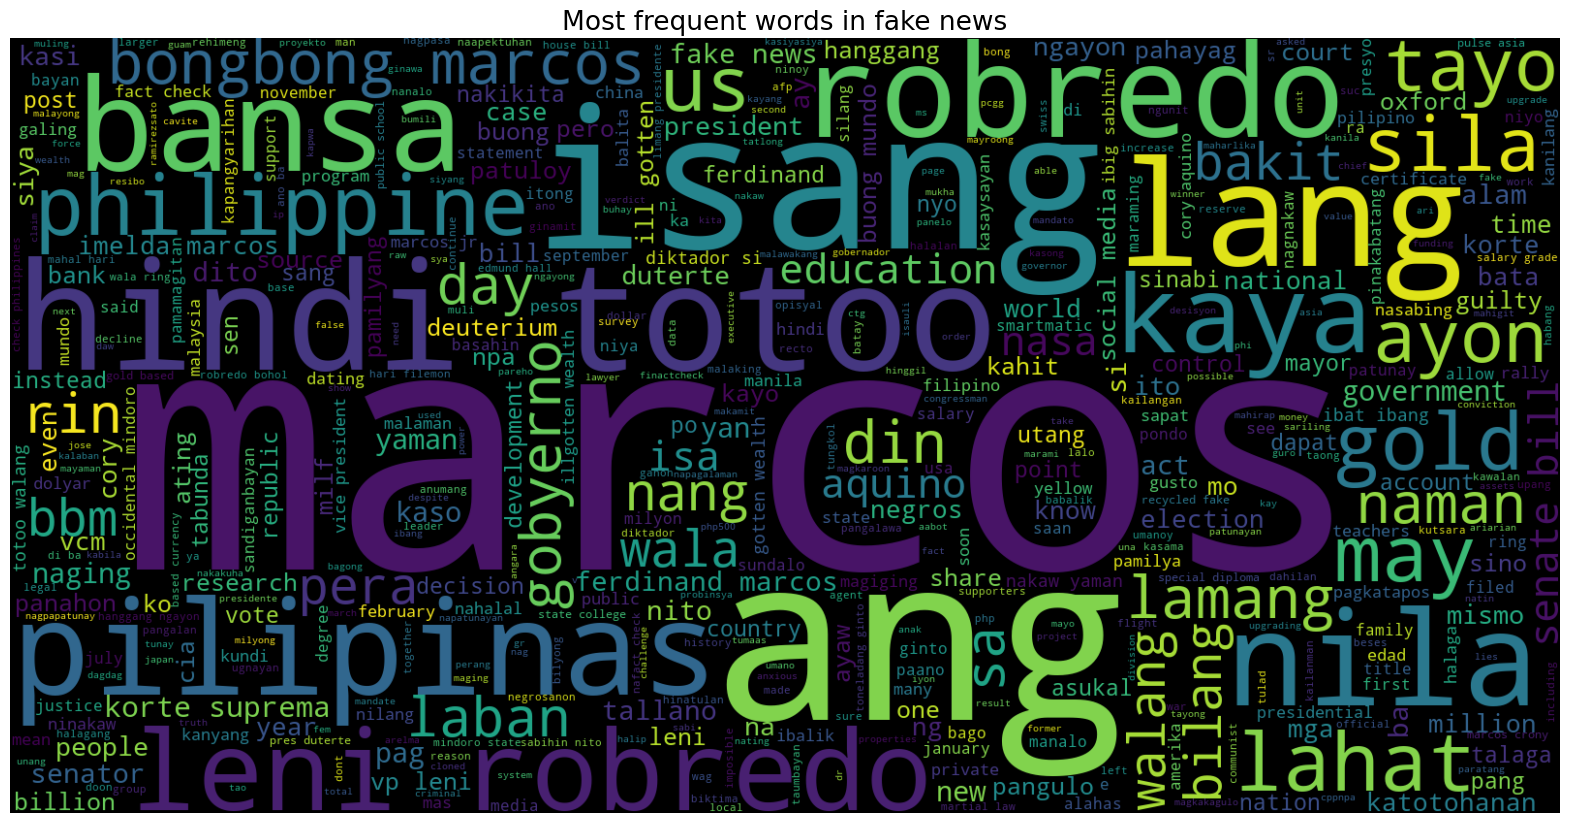

In [21]:
text = ' '.join([word for word in news_df['Data']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in fake news', fontsize = 19)
plt.show()

In [22]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(news_df['Data'])

In [23]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 9796

First 20 features: 
['0141' '0141 alinsunod' '01413' '01413 executive' '05' '05 2016' '08'
 '08 2016' '09' '09 2016' '10' '10 2021' '100' '100 billion' '1000'
 '1000 civil' '109with' '109with purpose' '11' '11 15']


In [24]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(news_df['Data'])

In [25]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 16758

First 20 features: 
['0141' '0141 alinsunod' '0141 alinsunod ra' '01413' '01413 executive'
 '01413 executive order' '05' '05 2016' '05 2016 turned' '08' '08 2016'
 '08 2016 day' '09' '09 2016' '09 2016 election' '09 2016 national' '10'
 '10 2021' '10 2021 senate' '100']


## Model Building

In [26]:
X = news_df['Data']
Y = news_df['Classification']
X = vect.transform(X)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(x_train)

  (0, 16253)	0.05778032311000965
  (0, 16252)	0.05778032311000965
  (0, 16251)	0.05778032311000965
  (0, 16250)	0.05778032311000965
  (0, 16249)	0.05778032311000965
  (0, 16246)	0.05255232717824119
  (0, 16042)	0.05778032311000965
  (0, 16041)	0.05255232717824119
  (0, 16038)	0.048843005033511994
  (0, 15597)	0.05778032311000965
  (0, 15596)	0.05778032311000965
  (0, 15581)	0.02286319916697895
  (0, 15342)	0.05778032311000965
  (0, 15341)	0.05778032311000965
  (0, 15336)	0.048843005033511994
  (0, 15241)	0.05778032311000965
  (0, 15240)	0.05778032311000965
  (0, 15237)	0.045965831251742716
  (0, 15085)	0.05778032311000965
  (0, 15084)	0.05778032311000965
  (0, 15083)	0.05778032311000965
  (0, 14718)	0.05778032311000965
  (0, 14717)	0.05778032311000965
  (0, 14716)	0.05778032311000965
  (0, 14715)	0.05778032311000965
  :	:
  (50, 1313)	0.06512403970160313
  (50, 1312)	0.059231580187798026
  (50, 1172)	0.06512403970160313
  (50, 1171)	0.06512403970160313
  (50, 1170)	0.06512403970160313


In [28]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))


Size of x_train: (51, 16758)
Size of y_train: (51,)
Size of x_test:  (13, 16758)
Size of y_test:  (13,)


In [29]:
from sklearn.ensemble import RandomForestClassifier


random_forest_classifier = RandomForestClassifier(max_depth=None, random_state=0)
random_forest_classifier.fit(x_train,y_train)

#---------------------------------------
# Predict output of the testing dataset
y_predict = random_forest_classifier.predict(x_test)

# Performance Metrics of SVM Model with DEFAULT PARAMETERS
print("CONFUSION MATRIx:")
print(confusion_matrix(y_test, y_predict))

classification_accuracy = accuracy_score(y_test, y_predict)
print('Classification Accuracy: %.4f'
        % classification_accuracy)
print('')

print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_predict, digits=4))

CONFUSION MATRIx:
[[5 0]
 [0 8]]
Classification Accuracy: 1.0000

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         5
           1     1.0000    1.0000    1.0000         8

    accuracy                         1.0000        13
   macro avg     1.0000    1.0000    1.0000        13
weighted avg     1.0000    1.0000    1.0000        13



In [30]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


# To apply K-fold cross validation for the model's performance
k_fold = KFold(n_splits=10)


print("Random Forest")

accuracies = cross_val_score(estimator= random_forest_classifier,X= X, y= Y, cv=k_fold,scoring='accuracy')
accuracies_average = accuracies.mean()
print('K-Fold Average Accuracy: %.4f' %accuracies_average)
accuracies_variance = accuracies.std()
print('K-Fold Variance: %.4f' %accuracies_variance)


# For the Classification Accuracy (Holdout)
classification_accuracy=accuracy_score( y_test, y_predict)
print('Classfication Accuracy: %.4f'
%classification_accuracy)
print(' ')


Random Forest
K-Fold Average Accuracy: 0.9357
K-Fold Variance: 0.0790
Classfication Accuracy: 1.0000
 


In [31]:
from sklearn.naive_bayes import GaussianNB
gaussian_naive_bayes = GaussianNB()
x_train_array = x_train.toarray()
gaussian_naive_bayes.fit(x_train_array,y_train)

#---------------------------------------
# Predict output of the testing dataset
x_test_array = x_test.toarray()
y_predict = gaussian_naive_bayes.predict(x_test_array)



# Performance Metrics of SVM Model with DEFAULT PARAMETERS
print("CONFUSION MATRIx:")
print(confusion_matrix(y_test, y_predict))

classification_accuracy = accuracy_score(y_test, y_predict)
print('Classification Accuracy: %.4f'
        % classification_accuracy)
print('')

print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_predict, digits=4))


CONFUSION MATRIx:
[[3 2]
 [1 7]]
Classification Accuracy: 0.7692

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0     0.7500    0.6000    0.6667         5
           1     0.7778    0.8750    0.8235         8

    accuracy                         0.7692        13
   macro avg     0.7639    0.7375    0.7451        13
weighted avg     0.7671    0.7692    0.7632        13



In [32]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


# To apply K-fold cross validation for the model's performance
k_fold = KFold(n_splits=10)


print("Naive Bayes")


X = X.toarray()

accuracies = cross_val_score(estimator= gaussian_naive_bayes,X= X, y= Y, cv=k_fold,scoring='accuracy')
accuracies_average = accuracies.mean()
print('K-Fold Average Accuracy: %.4f' %accuracies_average)
accuracies_variance = accuracies.std()
print('K-Fold Variance: %.4f' %accuracies_variance)


# For the Classification Accuracy (Holdout)
classification_accuracy=accuracy_score( y_test, y_predict)
print('Classfication Accuracy: %.4f'
%classification_accuracy)
print(' ')


Naive Bayes
K-Fold Average Accuracy: 0.9262
K-Fold Variance: 0.1332
Classfication Accuracy: 0.7692
 


In [37]:
input_data = ["BBM is the best president ever."]
input_data_array = np.array(input_data).reshape(-1, 1)
prediction = gaussian_naive_bayes.predict(input_data_array)
print(prediction)

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

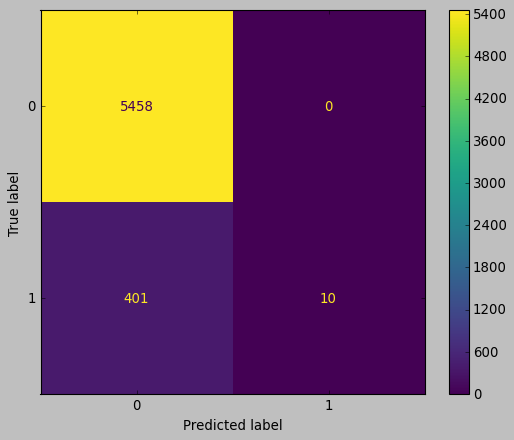

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.95
Best parameters:  {'C': 100, 'solver': 'newton-cg'}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 94.89%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[5450    8]
 [ 292  119]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5458
           1       0.94      0.29      0.44       411

    accuracy                           0.95      5869
   macro avg       0.94      0.64      0.71      5869
weighted avg       0.95      0.95      0.94      5869

